In [101]:
import pandas as pd
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from datetime import datetime



from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [102]:
#Load dataset into a pandas dataframe
df = pd.read_csv("../data/Cleaned data/data.csv") 

df.dropna(inplace = True)

df.head()

,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,DATE,TOTALDEMAND,HOLIDAY,MIN,MAX,SOLAR,TEMPAVE,RRP,FORECASTDEMAND,OUTPUT,MONTHDATE,WEEKDAY,WEEKEND
0,2016,1,1,0.656341,15.902439,2016-01-01,6853.633437,2.0,15.3,28.6,32.2,21.95,38.472917,6665.366167,23.465,01-2016,4,0
1,2016,1,2,0.656341,15.902439,2016-01-02,6727.613958,0.0,15.9,26.1,21.7,21.00,36.907292,6236.849955,23.465,01-2016,5,1
2,2016,1,3,0.688837,14.488372,2016-01-03,6616.406076,0.0,17.5,25.6,10.3,21.55,31.997083,6551.924748,23.465,01-2016,6,1
3,2016,1,4,0.679545,22.477273,2016-01-04,7367.750278,0.0,18.2,23.6,6.4,20.90,33.424583,6729.993123,23.465,01-2016,0,0
4,2016,1,5,0.768837,22.581395,2016-01-05,7462.242014,0.0,17.6,20.5,4.4,19.05,33.053958,7333.898202,23.465,01-2016,1,0


In [103]:


df = data.drop(['MIN','MAX', 'MONTHDATE','WEEKEND'], axis=1)


df.head()


,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,DATE,TOTALDEMAND,HOLIDAY,SOLAR,TEMPAVE,RRP,FORECASTDEMAND,OUTPUT,WEEKDAY
0,2016,1,1,0.656341,15.902439,2016-01-01,6853.633437,2.0,32.2,21.95,38.472917,6665.366167,23.465,4
1,2016,1,2,0.656341,15.902439,2016-01-02,6727.613958,0.0,21.7,21.00,36.907292,6236.849955,23.465,5
2,2016,1,3,0.688837,14.488372,2016-01-03,6616.406076,0.0,10.3,21.55,31.997083,6551.924748,23.465,6
3,2016,1,4,0.679545,22.477273,2016-01-04,7367.750278,0.0,6.4,20.90,33.424583,6729.993123,23.465,0
4,2016,1,5,0.768837,22.581395,2016-01-05,7462.242014,0.0,4.4,19.05,33.053958,7333.898202,23.465,1


In [104]:
# Onehot Encoding for categorial data (Weekday)


# Select the "WEEKDAY" column and create a new dataframe
weekday_df = df[['WEEKDAY']].reset_index(drop=True)


# Create a one-hot encoder object

encoder = OneHotEncoder(categories='auto')

# Fit and transform the weekday data
weekday_encoded = encoder.fit_transform(df[['WEEKDAY']]).toarray()

# Create a new dataframe with the encoded weekday data
weekday_df_encoded = pd.DataFrame(weekday_encoded, columns=['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']).reset_index(drop=True)


#Drop weekday column
df = df.drop(['WEEKDAY'], axis=1)


# Concatenate the original dataframe with the encoded weekday dataframe
df = pd.concat([df.reset_index(drop=True), weekday_df_encoded], axis=1)


df.head()

,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,DATE,TOTALDEMAND,HOLIDAY,SOLAR,TEMPAVE,RRP,FORECASTDEMAND,OUTPUT,MON,TUE,WED,THU,FRI,SAT,SUN
0,2016,1,1,0.656341,15.902439,2016-01-01,6853.633437,2.0,32.2,21.95,38.472917,6665.366167,23.465,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016,1,2,0.656341,15.902439,2016-01-02,6727.613958,0.0,21.7,21.00,36.907292,6236.849955,23.465,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016,1,3,0.688837,14.488372,2016-01-03,6616.406076,0.0,10.3,21.55,31.997083,6551.924748,23.465,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016,1,4,0.679545,22.477273,2016-01-04,7367.750278,0.0,6.4,20.90,33.424583,6729.993123,23.465,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1,5,0.768837,22.581395,2016-01-05,7462.242014,0.0,4.4,19.05,33.053958,7333.898202,23.465,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [105]:

# Convert the 'date' column to a datetime object
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' as the index
df.set_index('DATE', inplace=True)

print(df.columns)




Index(['YEAR', 'MONTH', 'DAY', 'HUMIDITY', 'WINDSPEED', 'TOTALDEMAND',
       'HOLIDAY', 'SOLAR', 'TEMPAVE', 'RRP', 'FORECASTDEMAND', 'OUTPUT', 'MON',
       'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'],
      dtype='object')


In [106]:
# Split the dataset into training and testing sets. 

df_train = df[(df.index >= datetime(2017, 8, 1)) & (df.index < datetime(2021, 8, 1))]
df_test = df[df.index >= datetime(2021, 8, 1)]



df_train.drop(['FORECASTDEMAND'], axis=1)
df_test.drop(['FORECASTDEMAND'], axis=1)

train_X = df_train.drop('TOTALDEMAND', axis=1)
train_y = df_train['TOTALDEMAND']

test_X = df_test.drop('TOTALDEMAND', axis=1)
test_y = df_test['TOTALDEMAND']

print("number of training records",len(train_X))
print("number of test records",len(test_X))

X_train = train_X.values
y_train = train_y.values

X_test = test_X.values
y_test = test_y.values


# save for plotting later
demand_train_df = df_train[['TOTALDEMAND','FORECASTDEMAND']]
demand_test_df = df_test[['TOTALDEMAND','FORECASTDEMAND']]

number of training records 1417
number of test records 334


In [107]:
# Normalize the data

scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

print("X_train_scaled:", len(X_train_scaled))
print("X_test_scaled:", len(X_test_scaled))

scaler_Y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.reshape(-1, 1))

print("y_train_scaled:", len(y_train_scaled))
print("y_test_scaled:", len(y_test_scaled))



X_train_scaled: 1417
X_test_scaled: 334
y_train_scaled: 1417
y_test_scaled: 334


In [108]:
#Reshape the data for input to the LSTM model
#(This step is fit the data to 3D tensor format for LSTM model to process the sequential data efficiently 
#and capture any temporal dependencies in the data)

#using sliding window approach to create input-output pairs with timesteps n = 1




X_train = []
y_train = []
for i in range(1, len(X_train_scaled)):
    X_train.append(X_train_scaled[i-1:i, :])
    y_train.append(y_train_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))


X_test = []
y_test = []
for i in range(1, len(X_test_scaled)):
    X_test.append(X_test_scaled[i-1:i, :])
    y_test.append(y_test_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))





print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)


X_train:  (1416, 1, 18)
y_train:  (1416, 1)
X_test:  (333, 1, 18)
y_test:  (333, 1)


In [109]:
# NOTE: THIS SECTION OF CODE COULD TAKE SERVERAL HOURS TO RUN TO ACHIEVE THE RESULT
# PLEASE BE MINDFUL, ONLY RUN IF NECESSARY 


# Define the best hyperparameters using GridSearchcv:

def create_model(optimizer = 'adam', neurons=10, dropout=0.2):

    model = Sequential()
    model.add(LSTM(units=neurons, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=neurons,activation='tanh', return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=neurons,activation='tanh', return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=neurons))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    return model
    


# Define the hyperparameters to search over
parameters = {
    'batch_size': [32,64],
    'epochs': [50, 100],
    'optimizer': [Adam(learning_rate=0.0001), Adam(learning_rate=0.001)],
    'neurons': [32,64, 128],
    'dropout': [0.2, 0.3]
}


# Create a KerasRegressor from the defined function
regressor = KerasRegressor(build_fn=create_model, verbose=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=parameters,
                           scoring='neg_mean_squared_error',
                           cv=10)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE
print('Best Parameters:', grid_search.best_params_)
print('Best MSE:', -grid_search.best_score_)  



Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.4661
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4523
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4357
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4144
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.3833
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3351
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2603
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1899
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1723
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1683
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1682
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1675
Epoch 13/50
40/40 [==============================

40/40 [==============================] - 0s 5ms/step - loss: 0.4401
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4231
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4006
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3670
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3139
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2345
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1703
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1601
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1544
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1555
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1570
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1542
Epoch 14/50
40/40 [==============================] - 0s 3ms

40/40 [==============================] - 0s 4ms/step - loss: 0.4198
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3945
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3572
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2210
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1699
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1616
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1578
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1624
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1637
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1610
Epoch 14/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1560
Epoch 15/50
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4152
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3808
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3242
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2420
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1776
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1704
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1674
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1667
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1610
Epoch 14/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1634
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1610
Epoch 16/50
40/40 [==============================] - 0s 4

40/40 [==============================] - 0s 4ms/step - loss: 0.3944
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.3439
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2669
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1941
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1715
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1706
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1642
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1635
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1654
Epoch 14/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1614
Epoch 15/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1632
Epoch 16/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1621
Epoch 17/50
40/40 [==============================] - 0s 

40/40 [==============================] - 0s 3ms/step - loss: 0.1246
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1034
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1013
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0984
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0941
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0932
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0921
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0928
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0876
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0852
Epoch 18/50
40/40 [==============================] - 0s

40/40 [==============================] - 0s 4ms/step - loss: 0.1105
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1017
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0982
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0965
Epoch 11/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0972
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0935
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0919
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0918
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0912
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0887
Epoch 17/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0882
Epoch 19/50
40/40 [==============================] - 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1045
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0982
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0902
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0915
Epoch 14/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0890
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0874
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0883
Epoch 17/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0878
Epoch 18/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0862
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 20/50
40/40 [==============================] - 

40/40 [==============================] - 0s 4ms/step - loss: 0.1001
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0951
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 15/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0893
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0874
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0865
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 19/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0884
Epoch 20/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 21/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.0970
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0909
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0916
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0892
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0872
Epoch 16/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0877
Epoch 17/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0881
Epoch 18/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0855
Epoch 19/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0859
Epoch 20/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 22/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1564
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1540
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1490
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1473
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1461
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1459
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1387
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1359
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1364
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1335
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1272
Epoch 23/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1479
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1491
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1420
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1406
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1366
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1338
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1311
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1303
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1243
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1249
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1232
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1194
Epoch 24/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1391
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1391
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1372
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1352
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1311
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1287
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1290
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1245
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1215
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1197
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 25/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1510
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1497
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1467
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1428
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1423
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1384
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1348
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1348
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1309
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1262
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1229
Epoch 26/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1401
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1418
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1393
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1370
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1320
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1304
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1314
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1271
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1262
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1218
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1201
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1167
Epoch 27/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.0797
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0793
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0772
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0764
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0754
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0760
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0757
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0769
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0762
Epoch 28/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.0778
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0780
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0765
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0777
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0751
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0765
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0742
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0753
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0749
Epoch 29/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0792
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0785
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0797
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0779
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0765
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0775
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0772
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0760
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 30/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.0778
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0773
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0777
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0764
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0753
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0741
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0741
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 30/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 31/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.0741
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0754
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0760
Epoch 23/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0745
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0735
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0738
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 30/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 31/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0738
Epoch 32/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0932
Epoch 22/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 23/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0907
Epoch 24/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0904
Epoch 25/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0912
Epoch 26/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0869
Epoch 27/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0876
Epoch 28/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0850
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0854
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0813
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch 33/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0934
Epoch 23/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0933
Epoch 24/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0927
Epoch 25/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0923
Epoch 26/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0914
Epoch 27/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0911
Epoch 28/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0899
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0860
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0864
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0831
Epoch 34/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0954
Epoch 24/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0930
Epoch 25/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0925
Epoch 26/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0894
Epoch 27/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0913
Epoch 28/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0881
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0860
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0894
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0888
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0865
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 35/50
40/40 [==============================] -

40/40 [==============================] - 0s 6ms/step - loss: 0.0890
Epoch 25/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0864
Epoch 26/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0866
Epoch 27/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0876
Epoch 28/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0872
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0849
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0842
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0829
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0839
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 35/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0833
Epoch 36/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0908
Epoch 26/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0867
Epoch 27/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0860
Epoch 28/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0852
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0850
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0826
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0845
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0829
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 35/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0821
Epoch 36/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 37/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0723
Epoch 27/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0744
Epoch 28/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0724
Epoch 29/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0715
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0727
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0700
Epoch 32/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0727
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 35/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0723
Epoch 36/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 37/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0699
Epoch 38/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0720
Epoch 28/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0720
Epoch 29/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0717
Epoch 30/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0728
Epoch 31/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0705
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0706
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0692
Epoch 35/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0709
Epoch 36/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 37/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0707
Epoch 38/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0696
Epoch 39/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0759
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0736
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0705
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0731
Epoch 32/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0738
Epoch 33/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0732
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0741
Epoch 35/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0724
Epoch 36/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0704
Epoch 37/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 38/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0719
Epoch 39/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0704
Epoch 40/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0735
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0724
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0730
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0723
Epoch 33/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0706
Epoch 34/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0702
Epoch 35/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0720
Epoch 36/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0727
Epoch 37/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0724
Epoch 38/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0704
Epoch 39/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 40/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0700
Epoch 41/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0705
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0698
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0677
Epoch 34/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 35/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0701
Epoch 36/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0676
Epoch 37/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0710
Epoch 38/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0675
Epoch 39/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0685
Epoch 40/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0671
Epoch 41/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 42/50
40/40 [==============================] -

40/40 [==============================] - 0s 3ms/step - loss: 0.1383
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1383
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1358
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1291
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1288
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1284
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1297
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1244
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1242
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1262
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1238
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1407
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1409
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1378
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1379
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1349
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1348
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1310
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1292
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1271
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1266
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1239
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1329
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1324
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1234
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1254
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1266
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1198
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1205
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1217
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1242
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1207
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1346
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1348
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1305
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1281
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1255
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1251
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1194
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1225
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1206
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1150
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1176
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1426
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1380
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1373
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1343
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1312
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1316
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1287
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1364
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1353
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1322
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1283
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1268
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1256
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1225
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1219
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1199
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1159
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1417
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1394
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1400
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1367
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1376
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1357
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1294
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1329
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1301
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1252
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1235
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1231
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1287
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1269
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1261
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1253
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1231
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1218
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1194
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1203
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1200
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1165
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1176
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1159
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1451
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1418
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1441
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1414
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1359
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1358
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1382
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1347
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1360
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1292
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1335
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1335
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1359
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1285
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1286
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1263
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1292
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1216
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1231
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1254
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1210
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1175
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1196
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0757
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0755
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0759
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0726
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0759
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0752
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0803
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0757
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0791
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0752
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0754
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0760
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0760
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 41/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0757
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0762
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1043
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1041
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1033
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0992
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0986
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0993
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0959
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0918
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0938
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0996
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0988
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0969
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0986
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0941
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0955
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0919
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1120
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1133
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1086
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1089
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1072
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1060
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1044
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1030
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0996
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0990
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0974
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0977
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0961
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0968
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0929
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0898
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0922
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0919
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1041
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1047
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1021
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1028
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1000
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0974
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1018
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0988
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0995
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0971
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0941
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1015
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1017
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0982
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0958
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0968
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0960
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0938
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0935
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0938
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0915
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0993
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0995
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0993
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0956
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0933
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1033
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1025
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0990
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0993
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0972
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0970
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0964
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1095
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1062
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1033
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1049
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0991
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1008
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0968
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0972
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0923
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1119
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1120
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1101
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1112
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1071
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1064
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1065
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1057
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1030
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1005
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0986
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0735
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0747
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0726
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0734
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0706
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0742
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0706
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0730
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0758
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0762
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0757
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0726
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0738
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0709
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0686
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0681
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0755
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0731
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0762
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0751
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0737
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0745
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0731
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0740
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0745
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0764
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0730
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0745
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0766
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0735
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0749
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0734
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0742
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0757
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0719
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0740
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0747
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0752
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0737
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0763
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0752
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0845
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0827
Epoch 33/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0824
Epoch 34/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0802
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0810
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0804
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0809
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0785
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0788
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0829
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0825
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0813
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0828
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0836
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0807
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0816
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0749
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0792
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0840
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0827
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0815
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0832
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0815
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0793
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0831
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0816
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0810
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0813
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0790
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0809
Epoch 37/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0816
Epoch 38/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 39/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0783
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0775
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0769
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0779
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0880
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0841
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0864
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0861
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0826
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0831
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0849
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0839
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0858
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0829
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0827
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0823
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0792
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0836
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0825
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0811
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0787
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0795
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0797
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0876
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0852
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0840
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0832
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0840
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0833
Epoch 39/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0829
Epoch 40/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0817
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0850
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0878
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0868
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0860
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0842
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0851
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0806
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0828
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0822
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0843
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0828
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0852
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0816
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 34/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0834
Epoch 35/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0824
Epoch 36/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0821
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0833
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0785
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0817
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0823
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0849
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0822
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0816
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0818
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0802
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0786
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0807
Epoch 42/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0819
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0709
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0703
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0696
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0720
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0696
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0686
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0700
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0691
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0701
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0685
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 33/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0699
Epoch 34/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0694
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0690
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0661
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0684
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0677
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0657
Epoch 41/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0671
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0703
Epoch 32/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0708
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0710
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0698
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 39/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0702
Epoch 40/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0699
Epoch 41/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0698
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0691
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0702
Epoch 33/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 34/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0679
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0675
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0686
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0683
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0668
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0713
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0721
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0734
Epoch 37/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0720
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0714
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0705
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0700
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0695
Epoch 32/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0761
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0701
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0680
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0666
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0659
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0658
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0673
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0679
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0723
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 33/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0722
Epoch 34/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0732
Epoch 35/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0719
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0713
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0718
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0700
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0703
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0703
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0707
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0720
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0719
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0713
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0719
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0715
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0725
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0711
Epoch 40/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0683
Epoch 41/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 42/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0689
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 8ms/step - loss: 0.0674
Epoch 32/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0683
Epoch 33/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0698
Epoch 34/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0706
Epoch 35/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0692
Epoch 36/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0684
Epoch 37/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0672
Epoch 38/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0683
Epoch 39/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0683
Epoch 40/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0672
Epoch 41/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0670
Epoch 42/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0673
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0761
Epoch 32/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0724
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0699
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0717
Epoch 35/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0724
Epoch 36/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0733
Epoch 37/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0711
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0699
Epoch 39/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0713
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0720
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0698
Epoch 42/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0702
Epoch 43/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1478
Epoch 33/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1445
Epoch 34/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1402
Epoch 35/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1419
Epoch 36/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1412
Epoch 38/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1356
Epoch 39/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1352
Epoch 40/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1360
Epoch 41/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1358
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1350
Epoch 43/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1295
Epoch 44/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1483
Epoch 34/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 35/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1416
Epoch 36/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1439
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1426
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1396
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1409
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1420
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1347
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1423
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1356
Epoch 45/50
40/40 [==============================] -

40/40 [==============================] - 0s 4ms/step - loss: 0.1542
Epoch 35/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1452
Epoch 36/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1478
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1478
Epoch 38/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1455
Epoch 39/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1430
Epoch 40/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1453
Epoch 41/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1441
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 43/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1422
Epoch 44/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1394
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1405
Epoch 46/50
40/40 [==============================] -

40/40 [==============================] - 0s 3ms/step - loss: 0.1487
Epoch 36/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1498
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1468
Epoch 38/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1509
Epoch 39/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1456
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1472
Epoch 41/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1411
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1411
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1397
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1411
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1412
Epoch 47/50
40/40 [==============================] -

40/40 [==============================] - 0s 3ms/step - loss: 0.1519
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1503
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1472
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1469
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1463
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1421
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1441
Epoch 43/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1447
Epoch 44/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1408
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1426
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1401
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1371
Epoch 48/50
40/40 [==============================] -

40/40 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0791
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 49/50
40/40 [==============================] -

40/40 [==============================] - 0s 3ms/step - loss: 0.0791
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0799
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 50/50
5/5 [==============================] - 1

40/40 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0818
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0808
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 44/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0786
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0796
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0786
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 50/50
5/5 [==============================] - 1s 1ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - los

40/40 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0799
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 50/50
5/5 [==============================] - 1s 1ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3767
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss

40/40 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0774
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0774
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 50/50
5/5 [==============================] - 1s 1ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3649
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1678
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss:

40/40 [==============================] - 0s 5ms/step - loss: 0.1042
Epoch 43/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1030
Epoch 44/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1047
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1022
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1045
Epoch 47/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1040
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1003
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1005
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.4558
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4374
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4083
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 

40/40 [==============================] - 0s 4ms/step - loss: 0.1048
Epoch 44/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1029
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1015
Epoch 47/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1054
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1005
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0990
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.4564
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4364
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4035
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3353
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0

40/40 [==============================] - 0s 4ms/step - loss: 0.1059
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1072
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1064
Epoch 47/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1095
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1057
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1024
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 5ms/step - loss: 0.4701
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4495
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4162
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3470
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2244
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.

40/40 [==============================] - 0s 4ms/step - loss: 0.0993
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1039
Epoch 47/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1002
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0992
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.4570
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4358
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4012
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3309
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2104
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1

40/40 [==============================] - 0s 4ms/step - loss: 0.1003
Epoch 47/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1003
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0982
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1001
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.4561
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4344
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3993
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3293
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2074
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1624
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1603
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.15

40/40 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3113
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1612
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1482
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1277
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1090
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1016
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0958
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0959
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.088

40/40 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 50/50
5/5 [==============================] - 1s 1ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3168
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1592
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1437
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1265
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1064
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0982
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0984
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0918
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0872
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.089

40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 50/50
5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3374
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1610
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1504
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1264
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1117
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1025
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0990
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0902
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.091

5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3164
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1552
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1432
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1068
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1008
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0915
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0907
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0882
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.086

5/5 [==============================] - 1s 2ms/step
Epoch 1/50
40/40 [==============================] - 5s 4ms/step - loss: 0.3109
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1470
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1303
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1172
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0984
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0945
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0860
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.086

40/40 [==============================] - 5s 6ms/step - loss: 0.4514
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.4127
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2927
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1657
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1627
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1553
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1531
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1525
Epoch 9/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1471
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1424
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1428
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1353
Epoch 13/50
40/40 [==============================] - 0s 5ms/

40/40 [==============================] - 0s 6ms/step - loss: 0.4121
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2928
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1679
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1598
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1511
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1483
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1456
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1416
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1374
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1300
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1285
Epoch 14/50
40/40 [==============================] - 0s 5ms

40/40 [==============================] - 0s 6ms/step - loss: 0.2958
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1675
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1605
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1585
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1553
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1539
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1508
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1474
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1419
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1412
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1383
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1312
Epoch 15/50
40/40 [==============================] - 0s 5m

40/40 [==============================] - 0s 6ms/step - loss: 0.1602
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1562
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.1520
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1463
Epoch 8/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1431
Epoch 9/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1448
Epoch 10/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1373
Epoch 11/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1341
Epoch 12/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1324
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1283
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1250
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1205
Epoch 16/50
40/40 [==============================] - 0s 5

40/40 [==============================] - 0s 6ms/step - loss: 0.1566
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1535
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1467
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1441
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1416
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1397
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1354
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1293
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1297
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1207
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1202
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1145
Epoch 17/50
40/40 [==============================] - 0s 

40/40 [==============================] - 0s 6ms/step - loss: 0.0847
Epoch 7/50
40/40 [==============================] - 0s 7ms/step - loss: 0.0840
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0811
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0797
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0801
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0758
Epoch 17/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0752
Epoch 18/50
40/40 [==============================] - 0s

40/40 [==============================] - 0s 6ms/step - loss: 0.0846
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0803
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0782
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0785
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0768
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0756
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0772
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0764
Epoch 17/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0741
Epoch 18/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0747
Epoch 19/50
40/40 [==============================] - 0

40/40 [==============================] - 0s 5ms/step - loss: 0.0846
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0823
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0774
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0788
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0756
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0780
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0732
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0789
Epoch 17/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0795
Epoch 18/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0743
Epoch 19/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0747
Epoch 20/50
40/40 [==============================] - 

40/40 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0846
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0811
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0804
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0801
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0794
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0791
Epoch 17/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0774
Epoch 18/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0782
Epoch 19/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0756
Epoch 20/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0769
Epoch 21/50
40/40 [==============================] -

40/40 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 11/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 12/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0789
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0801
Epoch 15/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0804
Epoch 16/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0769
Epoch 17/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0787
Epoch 18/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0758
Epoch 19/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0767
Epoch 20/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0745
Epoch 21/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0747
Epoch 22/50
40/40 [==============================] -

40/40 [==============================] - 0s 3ms/step - loss: 0.1189
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1189
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1213
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1177
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1170
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1172
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1136
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1166
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1133
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1115
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1158
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1152
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1145
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1127
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1131
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1122
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1101
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1101
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1090
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1199
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1206
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1167
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1187
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1175
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1156
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1148
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1179
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1145
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1181
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1171
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1176
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1124
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1137
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1099
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1095
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1072
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1089
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1104
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1150
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1057
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1073
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1193
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1198
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1204
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1180
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1169
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1127
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1155
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1132
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1152
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1131
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1136
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1122
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1150
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1163
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1132
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1127
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1158
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1139
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1101
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1146
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1086
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1158
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1142
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1151
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1123
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1130
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1109
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1166
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1133
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1099
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1110
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1133
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1183
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1139
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1121
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1113
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1100
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1089
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1121
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1183
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1171
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1167
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1140
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1124
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1138
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1134
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1097
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1127
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1107
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.1193
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1192
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1155
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1163
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1136
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1118
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1110
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1126
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1095
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1085
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1093
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0753
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0753
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0754
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0736
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0728
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0726
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0728
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0736
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0732
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0717
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0757
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0719
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0719
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0736
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0709
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0704
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0759
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0732
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0734
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0751
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0717
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0719
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0717
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0709
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0995
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0970
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0973
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0951
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0948
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0962
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0945
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0953
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0944
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0964
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0922
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0932
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0903
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0948
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0948
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0945
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0919
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0932
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0930
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0901
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0929
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0889
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0932
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0881
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.1002
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1016
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0966
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0985
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0965
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0973
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0984
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0977
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0973
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0960
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0945
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0982
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0955
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0972
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0933
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0937
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0962
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0923
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0938
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0945
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0935
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0915
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0925
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0914
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0961
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0889
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0919
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0967
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0975
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1001
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0999
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0959
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0967
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0942
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0925
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0958
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0972
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0967
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0977
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0970
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0941
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0960
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0928
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0916
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0902
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0906
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0930
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0925
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0923
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0906
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0890
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0916
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0706
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0687
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0663
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0709
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0674
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0734
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0719
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0719
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0669
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0674
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0683
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0706
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0726
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0686
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0683
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0681
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0803
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0804
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0826
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0812
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0825
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0851
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0822
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0801
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0807
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0784
Epoch 64/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0819
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0808
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0790
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0791
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0786
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0812
Epoch 71/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0794
Epoch 72/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0786
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0791
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0817
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0810
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0844
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0816
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0821
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0809
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0779
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0817
Epoch 72/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0794
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0791
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0784
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0788
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0781
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0785
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0793
Epoch 70/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0770
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0777
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0758
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0811
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0828
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0810
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0822
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0818
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0820
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0837
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0821
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0784
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0806
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0827
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0792
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0802
Epoch 67/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0823
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0794
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0794
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0838
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0836
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0812
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0807
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0818
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0810
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0821
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0838
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0812
Epoch 71/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0819
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0813
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 8ms/step - loss: 0.0837
Epoch 62/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0851
Epoch 63/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0825
Epoch 64/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0835
Epoch 65/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0841
Epoch 66/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0829
Epoch 67/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0824
Epoch 68/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0829
Epoch 69/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0829
Epoch 70/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0836
Epoch 71/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0817
Epoch 72/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0809
Epoch 73/100
40/40 [====================

40/40 [==============================] - 0s 9ms/step - loss: 0.0812
Epoch 62/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0796
Epoch 63/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0801
Epoch 64/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0826
Epoch 65/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0799
Epoch 66/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0800
Epoch 67/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0819
Epoch 68/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0788
Epoch 69/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0832
Epoch 70/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0804
Epoch 71/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0803
Epoch 72/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0790
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 7ms/step - loss: 0.0809
Epoch 62/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0831
Epoch 63/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0807
Epoch 64/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0827
Epoch 65/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0827
Epoch 66/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0833
Epoch 67/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0822
Epoch 68/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0801
Epoch 69/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0810
Epoch 70/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0802
Epoch 71/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0813
Epoch 72/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0809
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0689
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0690
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0678
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0691
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0671
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0676
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 71/100
40/40 [==============================] - 0s 11ms/step - loss: 0.0685
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 73/100
40/40 [====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0669
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0656
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0661
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0664
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0638
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0696
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0680
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0658
Epoch 71/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0661
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0651
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0694
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0683
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0694
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0684
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0676
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0668
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0684
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0681
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0699
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0692
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0680
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0684
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0656
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0665
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0674
Epoch 64/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0652
Epoch 65/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0664
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0663
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0675
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0687
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0654
Epoch 70/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0678
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0674
Epoch 72/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0704
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0697
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0713
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0712
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0695
Epoch 70/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0685
Epoch 71/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0699
Epoch 72/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0702
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0674
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0662
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 64/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0671
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0658
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0674
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0669
Epoch 68/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0669
Epoch 69/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0679
Epoch 70/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0655
Epoch 71/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 72/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0706
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0690
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0694
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0685
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 67/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0692
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0685
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0689
Epoch 70/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0666
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0694
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0699
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0692
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 64/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0705
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0699
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0703
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0706
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0684
Epoch 70/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0691
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 62/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0679
Epoch 63/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0668
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 66/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0658
Epoch 67/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0663
Epoch 68/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0662
Epoch 69/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0656
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0664
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 72/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0655
Epoch 73/100
40/40 [=====================

40/40 [==============================] - 0s 6ms/step - loss: 0.0676
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0679
Epoch 63/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0701
Epoch 64/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0688
Epoch 65/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0674
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0681
Epoch 67/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0666
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0684
Epoch 69/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 70/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0673
Epoch 71/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 72/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0669
Epoch 73/100
40/40 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.2950
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2525
Epoch 14/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2063
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1787
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1704
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1692
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1667
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1653
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1627
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1654
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1665
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 24/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.2321
Epoch 14/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1923
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1715
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1635
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1625
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1636
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1640
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1609
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1635
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1610
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1615
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1584
Epoch 25/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.2197
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1808
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1673
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1648
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1619
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1582
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1616
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1610
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1560
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1568
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1584
Epoch 26/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.1863
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1654
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1618
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1629
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1633
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1614
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1585
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1584
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1578
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1569
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1545
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1571
Epoch 27/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.1696
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1693
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1673
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1647
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1627
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1631
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1631
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1596
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1589
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1610
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1635
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1571
Epoch 28/50
20/20 [==============================] -

20/20 [==============================] - 0s 5ms/step - loss: 0.0944
Epoch 18/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0918
Epoch 19/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0899
Epoch 20/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0876
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0878
Epoch 22/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0872
Epoch 23/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0870
Epoch 24/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0852
Epoch 25/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0843
Epoch 26/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0836
Epoch 27/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 28/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0842
Epoch 29/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0925
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0889
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0871
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0852
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0857
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0825
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0821
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0842
Epoch 30/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0951
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0901
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0907
Epoch 23/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0874
Epoch 24/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0869
Epoch 25/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0872
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0824
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0847
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0837
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0829
Epoch 31/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0935
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0922
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0907
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0906
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0916
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0877
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0855
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0876
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0840
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 32/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0892
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0888
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0866
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0868
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0871
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0845
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0829
Epoch 33/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.1517
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1511
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1490
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1441
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1467
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 28/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1432
Epoch 29/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1411
Epoch 30/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1386
Epoch 31/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1367
Epoch 32/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1339
Epoch 33/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1337
Epoch 34/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.1456
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1409
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1418
Epoch 26/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1399
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1374
Epoch 28/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1357
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1330
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1329
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1314
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1305
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1274
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1218
Epoch 35/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.1486
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1486
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1475
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1449
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1429
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1441
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1423
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1382
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1367
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1349
Epoch 34/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1350
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1355
Epoch 36/50
20/20 [==============================] -

20/20 [==============================] - 0s 5ms/step - loss: 0.1423
Epoch 26/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1392
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1372
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1339
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1325
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1321
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1311
Epoch 32/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1276
Epoch 33/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1283
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1277
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1273
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1234
Epoch 37/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.1354
Epoch 27/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1352
Epoch 28/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1321
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1304
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1293
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1285
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1289
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1257
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1224
Epoch 35/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1244
Epoch 36/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1190
Epoch 37/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1171
Epoch 38/50
20/20 [==============================] -

20/20 [==============================] - 0s 5ms/step - loss: 0.0739
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0758
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0769
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0752
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0747
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 36/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0737
Epoch 37/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0745
Epoch 38/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0747
Epoch 39/50
20/20 [==============================] -

20/20 [==============================] - 0s 5ms/step - loss: 0.0744
Epoch 29/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0739
Epoch 30/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 31/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0740
Epoch 32/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0725
Epoch 33/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0730
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 36/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0735
Epoch 37/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 38/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 39/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0719
Epoch 40/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 30/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0777
Epoch 31/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0779
Epoch 32/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0749
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 37/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 38/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0742
Epoch 39/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0725
Epoch 40/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0743
Epoch 41/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0795
Epoch 31/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0774
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 33/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0768
Epoch 34/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0759
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0797
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0738
Epoch 37/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0757
Epoch 38/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0755
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0740
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 41/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0753
Epoch 42/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.0769
Epoch 32/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0774
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0756
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0745
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0754
Epoch 37/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0752
Epoch 38/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0749
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0745
Epoch 41/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0750
Epoch 42/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0760
Epoch 43/50
20/20 [==============================] -

20/20 [==============================] - 0s 7ms/step - loss: 0.0973
Epoch 33/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0920
Epoch 34/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0918
Epoch 35/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0902
Epoch 36/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0909
Epoch 37/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0898
Epoch 38/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0894
Epoch 39/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0891
Epoch 40/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0888
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0886
Epoch 42/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0882
Epoch 43/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0873
Epoch 44/50
20/20 [==============================] -

20/20 [==============================] - 0s 7ms/step - loss: 0.0952
Epoch 34/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0937
Epoch 35/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0933
Epoch 36/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0921
Epoch 37/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0910
Epoch 38/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0874
Epoch 39/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0873
Epoch 40/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0885
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0891
Epoch 42/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0862
Epoch 43/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0846
Epoch 44/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0827
Epoch 45/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0900
Epoch 35/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0896
Epoch 36/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0892
Epoch 37/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0857
Epoch 38/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0860
Epoch 39/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0836
Epoch 40/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0845
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0853
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0853
Epoch 43/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0819
Epoch 44/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0825
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0846
Epoch 46/50
20/20 [==============================] -

20/20 [==============================] - 0s 7ms/step - loss: 0.0916
Epoch 36/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0890
Epoch 37/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0900
Epoch 38/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0895
Epoch 39/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0875
Epoch 40/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0897
Epoch 41/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0868
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0867
Epoch 43/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0860
Epoch 44/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0887
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0878
Epoch 46/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0865
Epoch 47/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0957
Epoch 37/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0927
Epoch 38/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0917
Epoch 39/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0907
Epoch 40/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0904
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0919
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0878
Epoch 43/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0894
Epoch 44/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0887
Epoch 45/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0853
Epoch 46/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0852
Epoch 47/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0872
Epoch 48/50
20/20 [==============================] -

20/20 [==============================] - 0s 7ms/step - loss: 0.0700
Epoch 38/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0690
Epoch 39/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0696
Epoch 40/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0688
Epoch 41/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0692
Epoch 42/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0704
Epoch 43/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0686
Epoch 44/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0714
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0717
Epoch 46/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0686
Epoch 47/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 48/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0698
Epoch 49/50
20/20 [==============================] -

20/20 [==============================] - 0s 8ms/step - loss: 0.0682
Epoch 39/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0698
Epoch 40/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0692
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0699
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 43/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0664
Epoch 44/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0691
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 46/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0688
Epoch 47/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0679
Epoch 48/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0679
Epoch 49/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0684
Epoch 50/50
3/3 [==============================] - 1

20/20 [==============================] - 0s 6ms/step - loss: 0.0705
Epoch 40/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0674
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0691
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 43/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0721
Epoch 44/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0705
Epoch 46/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0717
Epoch 47/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0668
Epoch 48/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0662
Epoch 49/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0669
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 6ms/step - los

20/20 [==============================] - 0s 6ms/step - loss: 0.0706
Epoch 41/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0733
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0737
Epoch 43/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0703
Epoch 44/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0715
Epoch 46/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0709
Epoch 47/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0723
Epoch 48/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0706
Epoch 49/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0690
Epoch 50/50
3/3 [==============================] - 1s 3ms/step
Epoch 1/50
20/20 [==============================] - 5s 7ms/step - loss: 0.3668
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss

20/20 [==============================] - 0s 6ms/step - loss: 0.0720
Epoch 42/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0723
Epoch 43/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0707
Epoch 44/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 45/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0722
Epoch 46/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0720
Epoch 47/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0712
Epoch 48/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0692
Epoch 49/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0702
Epoch 50/50
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 4ms/step - loss: 0.4693
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4627
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - lo

20/20 [==============================] - 0s 4ms/step - loss: 0.1067
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1074
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1073
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1099
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1058
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1074
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1068
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4599
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4530
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1051
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1036
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1000
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1028
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1044
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1020
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1017
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0993
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 4ms/step - loss: 0.4578
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4515
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 5ms/step - loss: 0.1059
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1096
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1093
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1051
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1076
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1046
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1065
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1054
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4618
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4560
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1051
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1087
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1064
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1062
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1074
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1068
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1040
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1064
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4584
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4523
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1144
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1106
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1134
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1091
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1060
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1124
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1107
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1092
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1096
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4757
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4697
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1070
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1063
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1032
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1050
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1060
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1039
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1045
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1050
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1031
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4730
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4669
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1140
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1119
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1134
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1091
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1106
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1100
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1119
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1079
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1088
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4629
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4569
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1083
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1083
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1053
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1073
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1087
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1063
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1053
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4797
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4731
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1059
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1079
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1098
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1076
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1069
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1041
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1050
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4618
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4554
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.1079
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1038
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1053
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1043
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1029
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1025
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1012
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1024
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4395
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3251
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 4ms/step - loss: 0.4327
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3237
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4282
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3058
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0709
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0711
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0731
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0709
Epoch 98/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 4ms/step - loss: 0.4300
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3032
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 99/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 5ms/step - loss: 0.4266
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2971
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 93/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0724
Epoch 94/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 95/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0741
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 4ms/step - loss: 0.4496
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3442
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0687
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0686
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0680
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0687
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4399
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3112
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0719
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4309
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3021
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0730
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4481
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3254
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0683
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 5ms/step - loss: 0.4319
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3141
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0737
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0726
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0700
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 5ms/step - loss: 0.4686
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4602
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0873
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0874
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0855
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0866
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0850
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0857
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4592
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4504
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0873
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0853
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0867
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0829
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0846
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0843
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4567
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4480
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0886
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0869
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0860
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0862
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4605
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4515
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0837
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0825
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0854
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0806
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0820
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.4573
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4487
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0913
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0890
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0898
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0888
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 5ms/step - loss: 0.4750
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4663
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0865
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0898
Epoch 94/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0872
Epoch 95/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0875
Epoch 96/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0883
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0858
Epoch 98/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0856
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4723
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4641
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0906
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0903
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0923
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0869
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0883
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0887
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0894
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4621
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4541
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0901
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0889
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0901
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0894
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0875
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0909
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 5ms/step - loss: 0.4786
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4696
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0909
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0866
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0879
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0867
Epoch 99/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0890
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4603
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4502
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 5ms/step - loss: 0.0894
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0882
Epoch 93/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0866
Epoch 94/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0875
Epoch 95/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0861
Epoch 96/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0868
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 98/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0860
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4210
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2177
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0681
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0666
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0682
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4097
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2143
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0667
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0654
Epoch 95/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0660
Epoch 96/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0673
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0656
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4115
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2151
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 5ms/step - loss: 0.0685
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0681
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0682
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0679
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 99/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0666
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4074
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1961
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 92/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0668
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0652
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0657
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0658
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0650
Epoch 99/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0655
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4071
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1995
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0708
Epoch 93/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0702
Epoch 94/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0694
Epoch 95/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0692
Epoch 96/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 98/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0701
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 5ms/step - loss: 0.4273
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2163
Epoch 3/100
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0653
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0667
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 95/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0666
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0664
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0675
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4237
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2149
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0684
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0686
Epoch 98/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0696
Epoch 99/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0694
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4103
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1981
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 5ms/step - loss: 0.0706
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0709
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0686
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0683
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 5ms/step - loss: 0.4243
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2081
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0675
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0657
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0664
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 4ms/step - loss: 0.4124
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2032
Epoch 3/100
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 98/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0675
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0682
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.4672
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4544
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0794
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0788
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0776
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0773
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0779
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0764
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0758
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0768
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 7ms/step - loss: 0.4575
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4440
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0751
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0753
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0764
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0749
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0759
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0758
Epoch 98/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0747
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0734
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 7ms/step - loss: 0.4553
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4422
Epoch 3/100
20/20 [==============================] - 0s 8ms

20/20 [==============================] - 0s 8ms/step - loss: 0.0791
Epoch 92/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0794
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0795
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0794
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0790
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0784
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0787
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.4590
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4460
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 7ms/step - loss: 0.0761
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0758
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0737
Epoch 94/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0765
Epoch 95/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0736
Epoch 96/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0759
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0726
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0749
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0750
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.4559
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4432
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 8ms/step - loss: 0.0793
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0780
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0810
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0776
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0788
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0793
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0767
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0769
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0779
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 7ms/step - loss: 0.4733
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4602
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 7ms/step - loss: 0.0765
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0770
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0775
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0775
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0759
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0771
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0747
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0763
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0747
Epoch 100/100
3/3 [==============================] - 2s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 7ms/step - loss: 0.4701
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4560
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0789
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 94/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0783
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0768
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0780
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0777
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0767
Epoch 100/100
3/3 [==============================] - 2s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.4600
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4462
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0782
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0807
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0786
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0802
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0795
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0771
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 100/100
3/3 [==============================] - 2s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 7ms/step - loss: 0.4772
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4639
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 92/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0759
Epoch 93/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0744
Epoch 94/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0743
Epoch 95/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0755
Epoch 96/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0772
Epoch 97/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0776
Epoch 98/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0764
Epoch 99/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0757
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 8ms/step - loss: 0.4593
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4458
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0763
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0798
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0759
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0778
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0761
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0760
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0788
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0765
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 6s 6ms/step - loss: 0.3635
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1833
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0655
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0673
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0665
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0669
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0665
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0658
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0648
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 7ms/step - loss: 0.3513
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1792
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0644
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0646
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0629
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0637
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0649
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0645
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0643
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0638
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 6ms/step - loss: 0.3549
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1650
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 8ms/step - loss: 0.0648
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0672
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0647
Epoch 94/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0669
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0660
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0665
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0668
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0664
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0666
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 7ms/step - loss: 0.3603
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1688
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0649
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0656
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0652
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0645
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0635
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0630
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 7ms/step - loss: 0.3588
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1649
Epoch 3/100
20/20 [==============================] - 0s 8m

20/20 [==============================] - 0s 7ms/step - loss: 0.0679
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0688
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0670
Epoch 94/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0677
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0675
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0665
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0696
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0672
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 6s 7ms/step - loss: 0.3713
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1684
Epoch 3/100
20/20 [==============================] - 0s 7ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0631
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0630
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0633
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0641
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0628
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0632
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0645
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0637
Epoch 100/100
3/3 [==============================] - 1s 2ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.3769
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1733
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0662
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0675
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0663
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0664
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0670
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 7ms/step - loss: 0.3543
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1655
Epoch 3/100
20/20 [==============================] - 0s 8ms

20/20 [==============================] - 0s 6ms/step - loss: 0.0675
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0675
Epoch 93/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0678
Epoch 94/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0664
Epoch 95/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0659
Epoch 96/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0676
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 98/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0678
Epoch 99/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0670
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.3751
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1691
Epoch 3/100
20/20 [==============================] - 0s 6

20/20 [==============================] - 0s 7ms/step - loss: 0.0647
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0654
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 94/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0650
Epoch 95/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0650
Epoch 96/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0652
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 98/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0639
Epoch 99/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.3591
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1668
Epoch 3/100
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 10ms/step - loss: 0.0649
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0665
Epoch 93/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0677
Epoch 94/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0655
Epoch 95/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0657
Epoch 96/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 97/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0651
Epoch 98/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0648
Epoch 99/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0667
Epoch 100/100
3/3 [==============================] - 1s 3ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4688
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4612
Epoch 3/50
20/20 [==============================] - 0s 4ms/s

20/20 [==============================] - 0s 4ms/step - loss: 0.1532
Epoch 43/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1538
Epoch 44/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1480
Epoch 45/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1502
Epoch 46/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1505
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1436
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1461
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1495
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 6s 4ms/step - loss: 0.4582
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4522
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4459
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 

20/20 [==============================] - 0s 4ms/step - loss: 0.1571
Epoch 44/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 45/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1486
Epoch 46/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1507
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1517
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1482
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4591
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4531
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4469
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4401
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0

20/20 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 45/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1525
Epoch 46/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1529
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1547
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1488
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1570
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4728
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4662
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4591
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4515
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4432
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.

20/20 [==============================] - 0s 4ms/step - loss: 0.1491
Epoch 46/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1511
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1511
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1461
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1463
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4800
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4738
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4672
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4602
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4525
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4438
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4

20/20 [==============================] - 0s 4ms/step - loss: 0.1518
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1496
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1524
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1492
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4361
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3090
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1805
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1654
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1619
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1555
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1455
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 0.13

20/20 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0801
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0804
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4260
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2999
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1734
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1587
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1549
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1470
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1494
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1386
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.137

20/20 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0795
Epoch 50/50
3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 5ms/step - loss: 0.4268
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3084
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1733
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1624
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1585
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1570
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1520
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1379
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.130

20/20 [==============================] - 0s 4ms/step - loss: 0.0780
Epoch 50/50
3/3 [==============================] - 2s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 4ms/step - loss: 0.4392
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3040
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1769
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1645
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1592
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1557
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1494
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1446
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1372
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1311
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.126

3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 5ms/step - loss: 0.4501
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3321
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1783
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1638
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1574
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1568
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1505
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1469
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1386
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1318
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1249
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.119

3/3 [==============================] - 1s 2ms/step
Epoch 1/50
20/20 [==============================] - 5s 5ms/step - loss: 0.4678
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4580
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4465
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4322
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4129
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3850
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3431
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2819
Epoch 9/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2107
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1741
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1708
Epoch 12/50
20/20 [==============================] - 0s 5ms/step - loss: 0.169

20/20 [==============================] - 5s 5ms/step - loss: 0.4566
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4478
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4377
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4252
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4085
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3847
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3492
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2959
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2250
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1720
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1632
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1641
Epoch 13/50
20/20 [==============================] - 0s 5ms/

20/20 [==============================] - 0s 5ms/step - loss: 0.4474
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4365
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4228
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4050
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3797
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3411
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2851
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2162
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1718
Epoch 11/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1652
Epoch 12/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1637
Epoch 13/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1639
Epoch 14/50
20/20 [==============================] - 0s 5ms

20/20 [==============================] - 0s 5ms/step - loss: 0.4526
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4399
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4233
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3995
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3628
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3079
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2369
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1793
Epoch 11/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1753
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1674
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1676
Epoch 14/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1657
Epoch 15/50
20/20 [==============================] - 0s 4m

20/20 [==============================] - 0s 5ms/step - loss: 0.4493
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4338
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4119
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3782
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3275
Epoch 9/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2560
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1864
Epoch 11/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1691
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1658
Epoch 13/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1643
Epoch 14/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1615
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1627
Epoch 16/50
20/20 [==============================] - 0s 4

20/20 [==============================] - 0s 5ms/step - loss: 0.1501
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1448
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1326
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1205
Epoch 9/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1128
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1051
Epoch 11/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1000
Epoch 12/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0967
Epoch 13/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0966
Epoch 14/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0926
Epoch 15/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0899
Epoch 16/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0892
Epoch 17/50
20/20 [==============================] - 0s 

20/20 [==============================] - 0s 5ms/step - loss: 0.1399
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1319
Epoch 8/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1188
Epoch 9/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1093
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1037
Epoch 11/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0990
Epoch 12/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0940
Epoch 13/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0930
Epoch 14/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0958
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0898
Epoch 16/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0899
Epoch 17/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0931
Epoch 18/50
20/20 [==============================] - 0

20/20 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1132
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1089
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1032
Epoch 11/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1018
Epoch 12/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0961
Epoch 13/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0959
Epoch 14/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0935
Epoch 15/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0914
Epoch 16/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0895
Epoch 17/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0889
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 19/50
20/20 [==============================] - 0

20/20 [==============================] - 0s 4ms/step - loss: 0.1095
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1020
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1009
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0944
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 14/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0897
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0887
Epoch 17/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0874
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0879
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 20/50
20/20 [==============================] - 

20/20 [==============================] - 0s 4ms/step - loss: 0.1089
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1000
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0932
Epoch 14/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0908
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0913
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0919
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0846
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0854
Epoch 21/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.1585
Epoch 11/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1574
Epoch 12/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1564
Epoch 13/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1511
Epoch 14/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1472
Epoch 15/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1476
Epoch 16/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1462
Epoch 17/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1426
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1387
Epoch 19/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1359
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1358
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1312
Epoch 22/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.1511
Epoch 12/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1500
Epoch 13/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1482
Epoch 14/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1456
Epoch 15/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1456
Epoch 16/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1447
Epoch 17/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1422
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1388
Epoch 19/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1337
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1327
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1329
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1288
Epoch 23/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.1455
Epoch 13/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1491
Epoch 14/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1444
Epoch 15/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1451
Epoch 16/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1406
Epoch 17/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1390
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1358
Epoch 19/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1327
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1335
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1309
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1266
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1241
Epoch 24/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.1530
Epoch 14/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1491
Epoch 15/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1461
Epoch 16/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1465
Epoch 17/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1448
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1388
Epoch 19/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1393
Epoch 20/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1379
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1348
Epoch 22/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1307
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1256
Epoch 24/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1255
Epoch 25/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.1440
Epoch 15/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1440
Epoch 16/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1443
Epoch 17/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1408
Epoch 18/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1381
Epoch 19/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1367
Epoch 20/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1324
Epoch 21/50
20/20 [==============================] - 0s 7ms/step - loss: 0.1315
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1305
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1256
Epoch 24/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1260
Epoch 25/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1221
Epoch 26/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0840
Epoch 16/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0783
Epoch 17/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0806
Epoch 19/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0825
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0788
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0781
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0798
Epoch 24/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 25/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 26/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0775
Epoch 27/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0777
Epoch 17/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0818
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0787
Epoch 19/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0783
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0797
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0760
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0763
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0768
Epoch 24/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0781
Epoch 25/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 26/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0773
Epoch 27/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 28/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0821
Epoch 18/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0790
Epoch 19/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0813
Epoch 20/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0784
Epoch 21/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0796
Epoch 22/50
20/20 [==============================] - 0s 7ms/step - loss: 0.0785
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 24/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0790
Epoch 25/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 26/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 27/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0747
Epoch 28/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0775
Epoch 29/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0812
Epoch 19/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0797
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0799
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0789
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0773
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0783
Epoch 24/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0775
Epoch 25/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 26/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 27/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0758
Epoch 28/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0749
Epoch 29/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0782
Epoch 30/50
20/20 [==============================] -

20/20 [==============================] - 0s 6ms/step - loss: 0.0750
Epoch 20/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 21/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0762
Epoch 22/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 23/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0781
Epoch 24/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0748
Epoch 25/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0760
Epoch 26/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0739
Epoch 27/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0716
Epoch 28/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0727
Epoch 29/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0746
Epoch 30/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0733
Epoch 31/50
20/20 [==============================] -

20/20 [==============================] - 0s 4ms/step - loss: 0.1761
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1724
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1764
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1728
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1678
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1692
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1679
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1678
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1651
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1616
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1652
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1754
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1734
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1737
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1751
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1700
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1756
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1702
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1657
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1652
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1679
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1702
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1659
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1659
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1680
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1659
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1597
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1657
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1629
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1630
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1602
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1586
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1588
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1732
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1731
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1738
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1679
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1695
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1727
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1657
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1630
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1644
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1637
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1641
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1609
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1716
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1681
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1698
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1670
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1679
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1656
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1641
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1637
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1662
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1629
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1763
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1719
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1709
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1694
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1706
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1682
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1636
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1657
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1662
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1640
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1622
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1664
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1739
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1729
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1689
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1703
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1666
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1690
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1672
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1651
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1687
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1672
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1624
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1687
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1687
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1648
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1674
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1712
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1650
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1660
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1615
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1612
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1587
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1625
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1603
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1719
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1733
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1730
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1704
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1684
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1676
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1729
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1658
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1669
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1626
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1628
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1642
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1658
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1642
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1658
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1649
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1636
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1628
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1605
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1618
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1614
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1634
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1620
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0986
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0970
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0972
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0977
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0953
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0915
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0916
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0903
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.0963
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0976
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0940
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0942
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0925
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0903
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0919
Epoch 28/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0857
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0883
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0875
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0984
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0985
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0925
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0958
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0951
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0903
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0887
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0873
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0947
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0898
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0931
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0888
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0862
Epoch 30/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0857
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0953
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0948
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0930
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0926
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0918
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0923
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0892
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0889
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0938
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0961
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0937
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0906
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0872
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 30/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0877
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0989
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0987
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0978
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0935
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0925
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0937
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0907
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0934
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0992
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0990
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1010
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0965
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0976
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0957
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0928
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0936
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0920
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0915
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.1020
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0960
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0934
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0948
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0957
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0956
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0919
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0897
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0890
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0967
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0958
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0959
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0967
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0932
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0928
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0897
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0911
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0892
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.1583
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1557
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1543
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1535
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1544
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1486
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1505
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1494
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1454
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1463
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1411
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1432
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1549
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1513
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1506
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1518
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1508
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1520
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1494
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1468
Epoch 28/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1438
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1439
Epoch 30/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1403
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1402
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1460
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1472
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1467
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1455
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1421
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1429
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1400
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1423
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1375
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1381
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1325
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1551
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1565
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1568
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1529
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1521
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1485
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1506
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1494
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1508
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1468
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1466
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1560
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1552
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1492
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1504
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1475
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1456
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1449
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1435
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1406
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1428
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.1580
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1551
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1566
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1545
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1518A: 0s - loss: 0.153
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1541
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1486
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1493
Epoch 29/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1448
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1440
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 32/100
20/20 [==

20/20 [==============================] - 0s 4ms/step - loss: 0.1596
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1588
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1565
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1538
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1547
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1473
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1521
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1529
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1501
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1447
Epoch 30/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1465
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1469
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.1505
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1536
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1472
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1491
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1453
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1445
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1432
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1419
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1392
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1378
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1384
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.1575
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1489
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1502
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1506
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1491
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1461
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1456
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1426
Epoch 28/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1397
Epoch 29/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1392
Epoch 30/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1412
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1415
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.1481
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1487
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1497
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1492
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1430
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1472
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1425
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1442
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1429
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1385
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1412
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1376
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.0869
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0865
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0839
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0836
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0833
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0838
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0814
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0792
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0847
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0835
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0850
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0821
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0816
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0779
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0756
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0779
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0820
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0864
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0840
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0794
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0842
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0796
Epoch 28/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0810
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0815
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0804
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0840
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0820
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0815
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0801
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0792
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0782
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.0867
Epoch 21/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0849
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0841
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0822
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0846
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0814
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0835
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0830
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0812
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0810
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0811
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 5ms/step - loss: 0.0827
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0833
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0852
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0850
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0833
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0801
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0837
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0807
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0786
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0850
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0855
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0841
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0858
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0845
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0815
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0832
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0830
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0840
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0815
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0795
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0806
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0811
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0785
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0868
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0841
Epoch 22/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0840
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0830
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0802
Epoch 28/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0781
Epoch 29/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0805
Epoch 30/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0793
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0787
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 23/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 24/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0853
Epoch 25/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0841
Epoch 26/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 27/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0827
Epoch 29/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0804
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0811
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0833
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 7ms/step - loss: 0.1418
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1334
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1340
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1324
Epoch 24/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1286
Epoch 25/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1275
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1236
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1206
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1165
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1137
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1113
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1100
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 8ms/step - loss: 0.1428
Epoch 21/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1385
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1377
Epoch 23/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1324
Epoch 24/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1289
Epoch 25/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1290
Epoch 26/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1276
Epoch 27/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1239
Epoch 28/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1179
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1177
Epoch 30/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1118
Epoch 31/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1131
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.1314
Epoch 21/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1285
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1267
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1242
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1203
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1205
Epoch 26/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1196
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1163
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1133
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1148
Epoch 30/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1103
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1079
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 7ms/step - loss: 0.1382
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1352
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1320
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1297
Epoch 24/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1266
Epoch 25/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1232
Epoch 26/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1221
Epoch 27/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1201
Epoch 28/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1176
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1133
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1103
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1059
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.1358
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1330
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1314
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1266
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1249
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1223
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1183
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1154
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1156
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1120
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1091
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1081
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 10ms/step - loss: 0.1336
Epoch 21/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1324
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1338
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1257
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1324
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1253
Epoch 26/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1203
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1183
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1157
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1093
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1075
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1067
Epoch 32/100
20/20 [====================

20/20 [==============================] - 0s 6ms/step - loss: 0.1357
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1344
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1324
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1285
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1276
Epoch 25/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1209
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1197
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1147
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1138
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1085
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1069
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1050
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.1361
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1344
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1323
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1277
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1279
Epoch 25/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1247
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1213
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1206
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1183
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1141
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1103
Epoch 31/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1109
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 7ms/step - loss: 0.1322
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1285
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1267
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1258
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1217
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1184
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1155
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1156
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1141
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1097
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1081
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1076
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.1364
Epoch 21/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1337
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1312
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1272
Epoch 24/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1247
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1254
Epoch 26/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1191
Epoch 27/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1177
Epoch 28/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1157
Epoch 29/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1132
Epoch 30/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1125
Epoch 31/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1108
Epoch 32/100
20/20 [====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0776
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0769
Epoch 23/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0781
Epoch 24/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0750
Epoch 25/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0762
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0756
Epoch 27/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0778
Epoch 28/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0752
Epoch 30/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0765
Epoch 31/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0755
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0751
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 23/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0758
Epoch 24/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0768
Epoch 25/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0755
Epoch 26/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0735
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0733
Epoch 28/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0748
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0741
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0722
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0727
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 8ms/step - loss: 0.0784
Epoch 21/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0767
Epoch 22/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0767
Epoch 23/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0782
Epoch 24/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0772
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0787
Epoch 26/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0761
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 30/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0738
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0790
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0770
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0755
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0743
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0737
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0746
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0748
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0744
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0731
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0734
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0710
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0734
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 7ms/step - loss: 0.0815
Epoch 21/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0784
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0801
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0777
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0775
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0792
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0778
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0752
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0773
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0763
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0761
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0742
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0753
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0764
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0728
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0775
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0736
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0723
Epoch 28/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0737
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0737
Epoch 30/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0744
Epoch 31/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0742
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0767
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0810
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0807
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0805
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0788
Epoch 27/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0770
Epoch 28/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0767
Epoch 29/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0756
Epoch 30/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0768
Epoch 31/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0779
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0793
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0777
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0782
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0787
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0781
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0783
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0751
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0752
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0764
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0732
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 21/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0768
Epoch 22/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0773
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0767
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0755
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0754
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0728
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0769
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0740
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0739
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0733
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0740
Epoch 32/100
20/20 [=====================

20/20 [==============================] - 0s 7ms/step - loss: 0.0806
Epoch 21/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0785
Epoch 22/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0796
Epoch 23/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0798
Epoch 24/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0784
Epoch 25/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0780
Epoch 26/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0760
Epoch 27/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0772
Epoch 28/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0790
Epoch 29/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0748
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0752
Epoch 31/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0736
Epoch 32/100
20/20 [=====================

45/45 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 22/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0792
Epoch 23/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0780
Epoch 24/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0777
Epoch 25/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0783
Epoch 26/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0779
Epoch 27/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 28/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0780
Epoch 29/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 30/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0754
Epoch 31/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0735
Epoch 32/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0759
Epoch 33/50
45/45 [==============================] -

In [113]:
# Extract the best hyperparameters
best_batch_size = grid_search.best_params_['batch_size']
best_epochs = grid_search.best_params_['epochs']
best_dropout = grid_search.best_params_['dropout']
best_optimizer = grid_search.best_params_['optimizer']
best_neurons = grid_search.best_params_['neurons']

# Build and compile the model with the best hyperparameters

model = Sequential()
model.add(LSTM(units=best_neurons, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(best_dropout))
model.add(LSTM(units=best_neurons,activation='tanh', return_sequences=True))
model.add(Dropout(best_dropout))
model.add(LSTM(units=best_neurons,activation='tanh', return_sequences=True))
model.add(Dropout(best_dropout))
model.add(LSTM(units=best_neurons))
model.add(Dropout(best_dropout))
model.add(Dense(units=1, activation='linear'))


# Compile the model with the best optimizer found using grid search
optimizer = best_optimizer
model.compile(loss='mean_absolute_error', optimizer=optimizer)


# Train the model with the best number of epochs and batch size found using grid search
history = model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test, y_test))



Epoch 1/50
45/45 [==============================] - 6s 28ms/step - loss: 0.3038 - val_loss: 0.1771
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1598 - val_loss: 0.1760
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1387 - val_loss: 0.1337
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1155 - val_loss: 0.1168
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1038 - val_loss: 0.0904
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0971 - val_loss: 0.0932
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0931 - val_loss: 0.0861
Epoch 8/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0920 - val_loss: 0.0779
Epoch 9/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0888 - val_loss: 0.0765
Epoch 10/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0871 - val_loss: 0.0730
Epoch 11/50
45/45 

In [114]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Evaluate the LSTM model on the test set
# Calculate MSE, MAE and R-squared

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: %.4f' % mse)
print('MAE: %.4f' % mae)
print('R-squared: %.4f' % r2)

MSE: 0.0089
MAE: 0.0715
R-squared: 0.7406


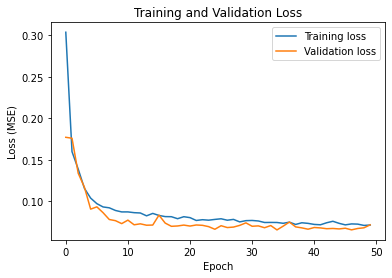

In [117]:
# Plot training and validation loss (MSE) for each epoch

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime as dt


plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()




In [118]:
# revert the predicted values to actual values
y_pred_reverted = scaler_Y.inverse_transform(y_pred)

y_pred_reverted = list(y_pred_reverted.flatten())
y_pred_reverted.insert(0, np.nan)

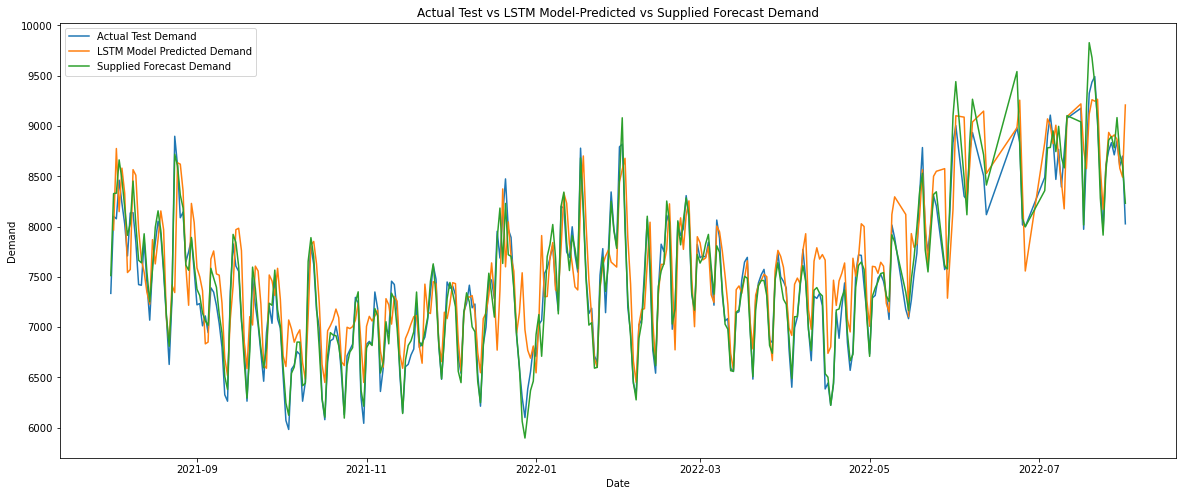

In [119]:
# Plot Predicted Demand vs Actual Demand and Supplied Forecast Demand for the 5 years period

test_set_df = demand_test_df.copy()
test_set_df['Pred_Demand'] = y_pred_reverted

plt.rcParams["figure.figsize"] = (20,8)
plt.plot(test_set_df.index, test_set_df.TOTALDEMAND, label='Actual Test Demand')
plt.plot(test_set_df.index, test_set_df.Pred_Demand, label='LSTM Model Predicted Demand')
plt.plot(test_set_df.index, test_set_df.FORECASTDEMAND, label='Supplied Forecast Demand')
plt.title('Actual Test vs LSTM Model-Predicted vs Supplied Forecast Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()